In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score

In [2]:
wine_data = pd.read_csv('data/winequality-red.csv')
X = wine_data.drop('quality', axis=1)

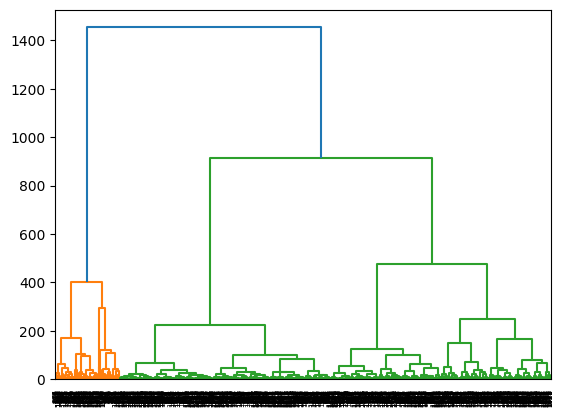

In [3]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()

In [8]:
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
hc.fit(X)
print(hc.n_clusters_)

3


In [19]:
squared_distances = []
scores = []

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    preds = kmeans.fit_predict(X)
    squared_distances.append(kmeans.inertia_)
    scores.append(silhouette_score(X, preds))

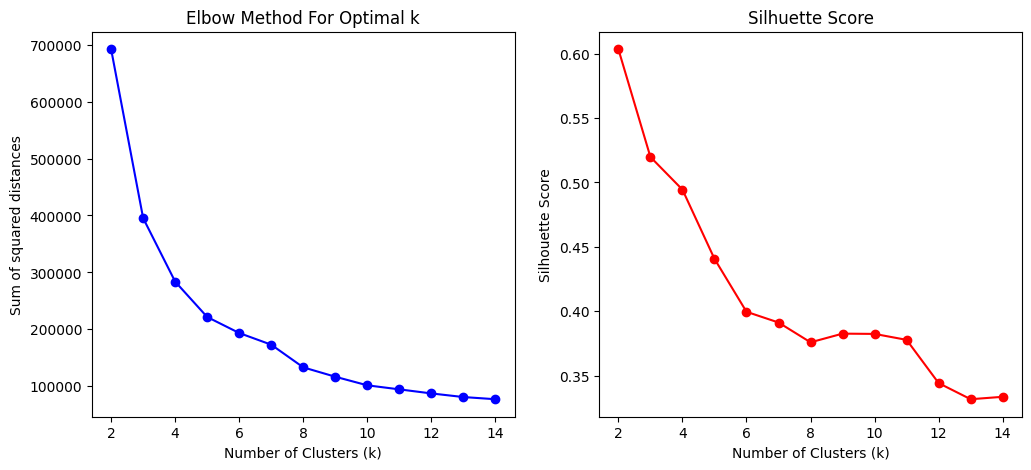

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(range(2, 15), squared_distances, 'bo-')
ax[0].set_xlabel('Number of Clusters (k)')
ax[0].set_ylabel('Sum of squared distances')
ax[0].set_title('Elbow Method For Optimal k')

ax[1].plot(range(2, 15), scores, 'ro-')
ax[1].set_xlabel('Number of Clusters (k)')
ax[1].set_ylabel('Silhouette Score')
ax[1].set_title('Silhuette Score')
plt.show()

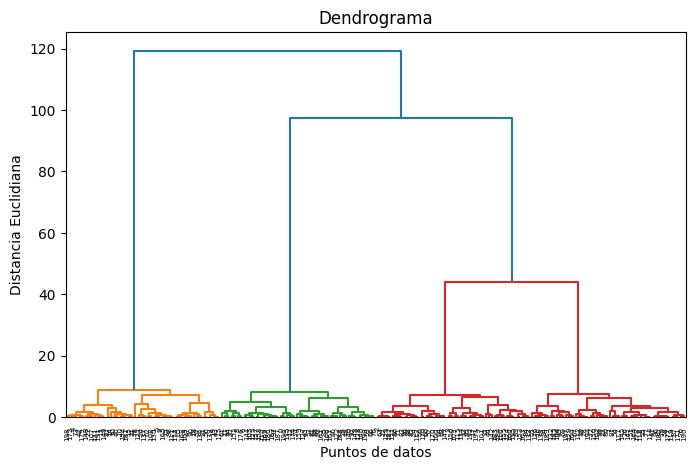

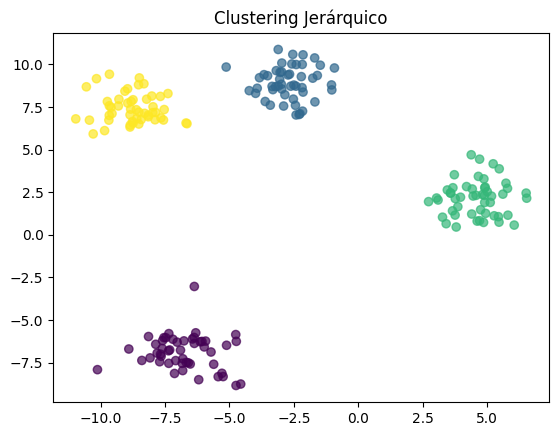

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Generamos datos sintéticos
X, _ = make_blobs(n_samples=200, centers=4, cluster_std=1.0, random_state=42)

# Creamos el dendrograma
plt.figure(figsize=(8,5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrograma")
plt.xlabel("Puntos de datos")
plt.ylabel("Distancia Euclidiana")
plt.show()

# Aplicamos clustering jerárquico
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_hc = hc.fit_predict(X)

# Visualizamos los clusters
plt.scatter(X[:, 0], X[:, 1], c=y_hc, cmap='viridis', alpha=0.7)
plt.title("Clustering Jerárquico")
plt.show()


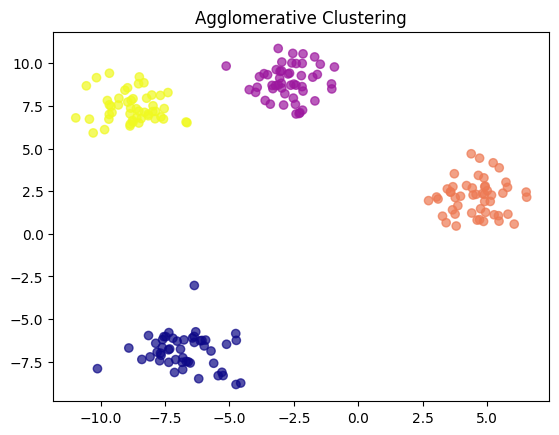

In [27]:
from sklearn.cluster import AgglomerativeClustering

# Aplicamos Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_agg = agg_clustering.fit_predict(X)

# Visualizamos los clusters
plt.scatter(X[:, 0], X[:, 1], c=y_agg, cmap='plasma', alpha=0.7)
plt.title("Agglomerative Clustering")
plt.show()


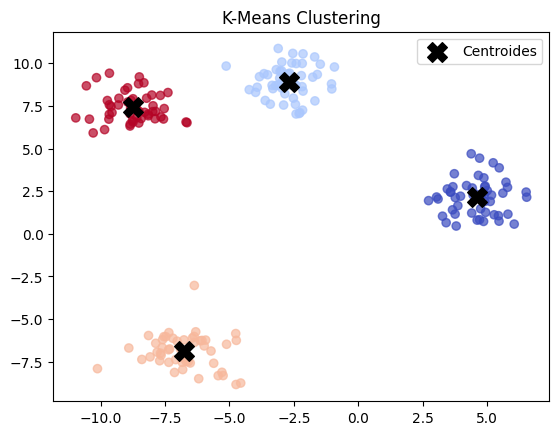

In [28]:
from sklearn.cluster import KMeans

# Aplicamos K-Means con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Visualizamos los clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='coolwarm', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroides')
plt.title("K-Means Clustering")
plt.legend()
plt.show()


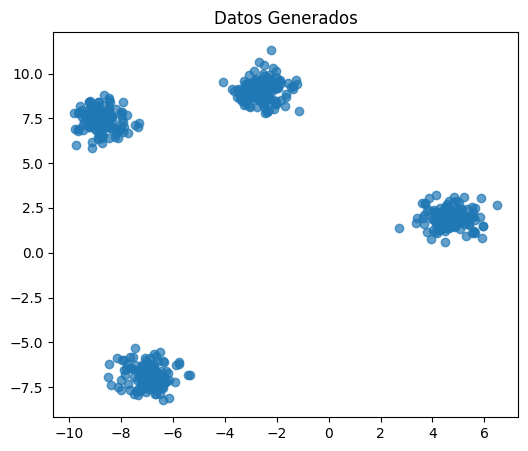

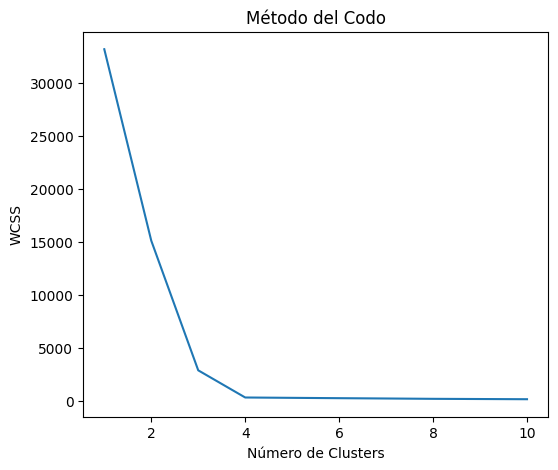

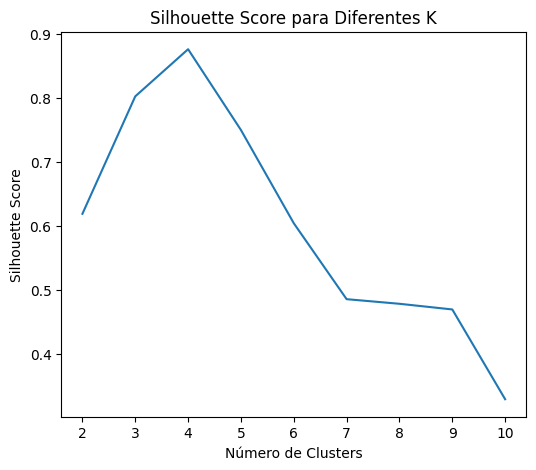

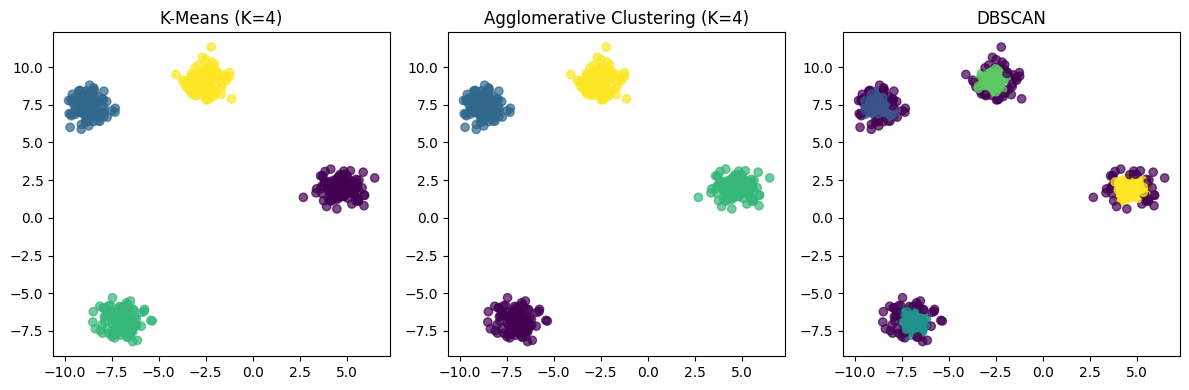

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

# Generamos datos sintéticos
X, y = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=42)

# Visualizamos los datos generados
plt.figure(figsize=(6,5))
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
plt.title("Datos Generados")
plt.show()

# 1. K-Means: Método del Codo
# Probar diferentes valores de K (número de clusters)
wcss = []  # Intra-cluster sum of squares (WCSS) para el Método del Codo
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Visualizamos el gráfico del Método del Codo
plt.figure(figsize=(6,5))
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

# El número de clusters óptimos (usualmente el punto donde la curva se "aplana")

# 2. Evaluar Silhouette Score para K-Means
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Visualizamos el Silhouette Score
plt.figure(figsize=(6,5))
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score para Diferentes K')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# 3. Aplicamos Clustering con diferentes algoritmos

# a) K-Means con el número óptimo de clusters (usamos K=4 por el Método del Codo)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# b) Agglomerative Clustering (usamos 4 clusters)
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_clustering.fit_predict(X)

# c) DBSCAN (no requiere número de clusters, pero es sensible a la distancia)
dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan_labels = dbscan.fit_predict(X)

# Visualización de los resultados

plt.figure(figsize=(12, 4))

# K-Means
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.7)
plt.title("K-Means (K=4)")

# Agglomerative Clustering
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=agg_labels, cmap='viridis', alpha=0.7)
plt.title("Agglomerative Clustering (K=4)")

# DBSCAN
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.7)
plt.title("DBSCAN")

plt.tight_layout()
plt.show()


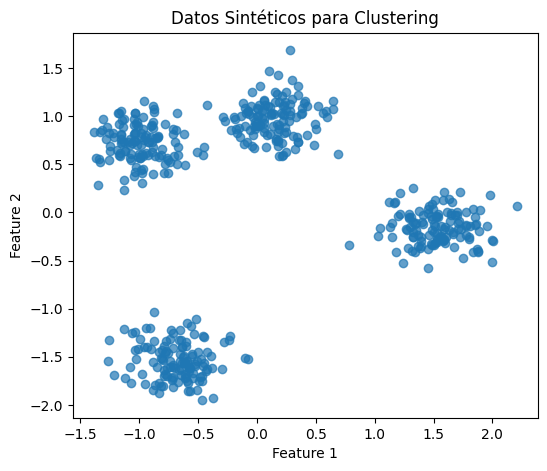

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generamos datos sintéticos con 4 clusters
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.2, random_state=42)

# Normalizamos los datos para mejorar los resultados del clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Graficamos los datos generados
plt.figure(figsize=(6,5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.7)
plt.title("Datos Sintéticos para Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [33]:
squared_distances = []
scores = []

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    preds = kmeans.fit_predict(X)
    squared_distances.append(kmeans.inertia_)
    scores.append(silhouette_score(X, preds))

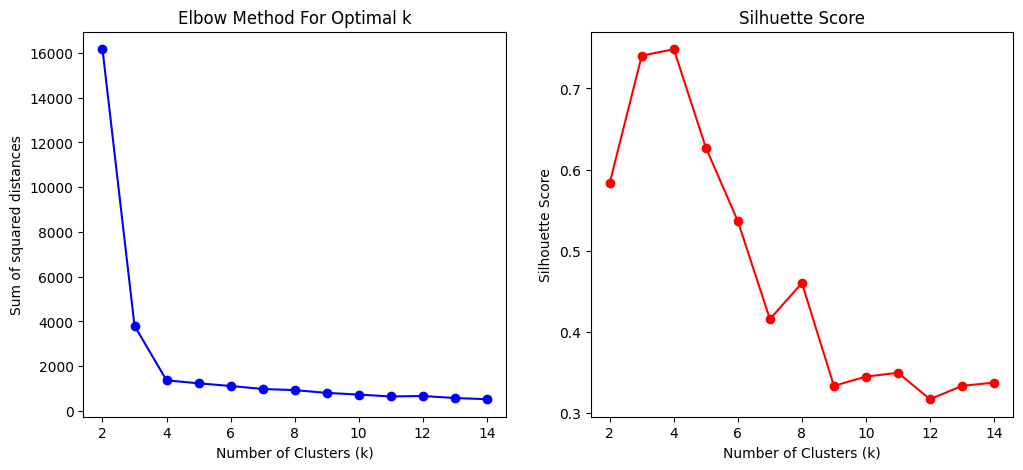

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(range(2, 15), squared_distances, 'bo-')
ax[0].set_xlabel('Number of Clusters (k)')
ax[0].set_ylabel('Sum of squared distances')
ax[0].set_title('Elbow Method For Optimal k')

ax[1].plot(range(2, 15), scores, 'ro-')
ax[1].set_xlabel('Number of Clusters (k)')
ax[1].set_ylabel('Silhouette Score')
ax[1].set_title('Silhuette Score')
plt.show()

In [36]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

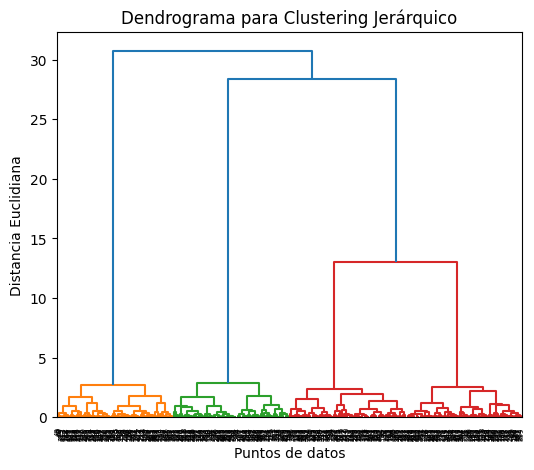

In [37]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Creamos el dendrograma
plt.figure(figsize=(6,5))
sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrograma para Clustering Jerárquico")
plt.xlabel("Puntos de datos")
plt.ylabel("Distancia Euclidiana")
plt.show()

# Aplicamos clustering jerárquico con 4 clusters
hc = AgglomerativeClustering(n_clusters=4, linkage='ward')
y_hc = hc.fit_predict(X_scaled)

In [38]:
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='average')
y_agg = agg_clustering.fit_predict(X_scaled)


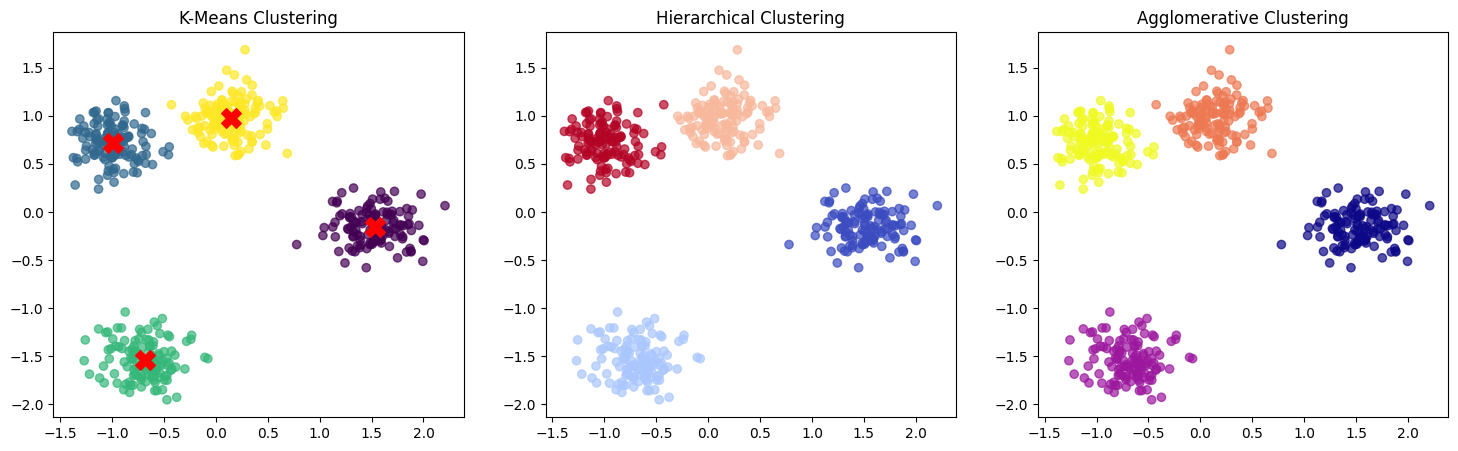

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))

# K-Means
ax[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', alpha=0.7)
ax[0].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
              s=200, c='red', marker='X', label='Centroides')
ax[0].set_title("K-Means Clustering")

# Hierarchical Clustering
ax[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_hc, cmap='coolwarm', alpha=0.7)
ax[1].set_title("Hierarchical Clustering")

# Agglomerative Clustering
ax[2].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_agg, cmap='plasma', alpha=0.7)
ax[2].set_title("Agglomerative Clustering")

plt.show()
